In [1]:
import quickage
import warnings
warnings.filterwarnings("ignore")

In [2]:
folder='../figures/'

In [3]:
#FeH = -0.38±0.07
#RV = +15±6 km/s (no Keck, could get with NIRSPEC)
#Gaia EDR: 
#π = 17.985±0.041 mas
#µra = 226.011±0.052 mas/yr
#µdec = -336.242±0.035 mas/yr

#coordinates: 04 16 31.1617564071 -28 18 52.954336524
#parallax (Gaia): 30.9326 [0.0418] mas
#proper motion (Gaia): 218.569 -251.145 [0.036 0.047]  mas/yr
#[Fe/H] = -0.03±0.09
#RV: some confusion here in the measurement, either +8.92±0.04 or +3.49±0.02 km/s - try both

import astropy.coordinates as astro_coord
import astropy.units as u

#c = astro_coord.SkyCoord('04:16:31.1617564071 -28:18:52.954336524', unit=(u.hourangle, u.deg))
#c=astro_coord.SkyCoord('04:16:31.1617564071 -28:18:52.954336524', unit=(u.hourangle, u.deg))
c =astro_coord.SkyCoord('07 35 24.25 -73 34 38.8', unit=(u.hourangle, u.deg))

In [4]:
#coordinates: 04 16 31.1617564071 -28 18 52.954336524
#parallax (Gaia): 30.9326 [0.0418] mas
#proper motion (Gaia): 218.569 -251.145 [0.036 0.047]  mas/yr
#[Fe/H] = -0.03±0.09
#RV = 27.94 +/- 0.60 km/s

In [5]:
import numpy as np
p=np.random.normal( 23.512, 0.018, 1000)
d, dunc=np.nanmedian(1000/p), np.nanstd(1000/p)
d

42.53188567727001

In [6]:
sourc={'ra':c.ra.to(u.degree).value, \
        'dec': c.dec.to(u.degree).value,\
        'pmra':(82.628, 0.022), 
        'pmdec': (9.92, .022),
       'distance':(d, dunc),
        'rv': (55.8, 2.7 )}

metal= (0.09, 0.02)

filename=folder+'/toi_j0735'

#trapp={'ra': 346.6250957,
#              'dec':-5.0428081,
#              'pmra': (922.0 , 0.6),
#              'pmdec': (-471.9, 0.9),
#              'distance':  (12.49 , 0.18),
#              'rv': (-51.688, 0.014)}
#trapp_metal=(0.04 , 0.08)

#ltteratiure 7.6 +/- 2.2

#sourc={'ra':246.0683, \
#        'dec': -32.2039,\
#        'pmra':(-25.809, 0.159),
#        'pmdec':(-185.783, 0.122),
#       'distance':(16.9465, 0.0356),
#       'rv': (0.23, 0.08)}

#metal= (0.29 , 0.07)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


Age: 7.24 -2.98 +2.03 Gyr


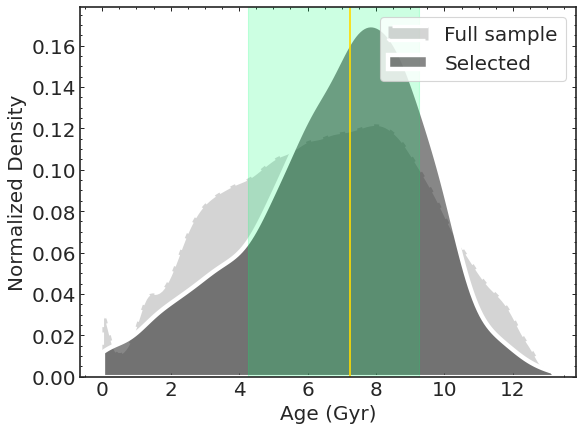

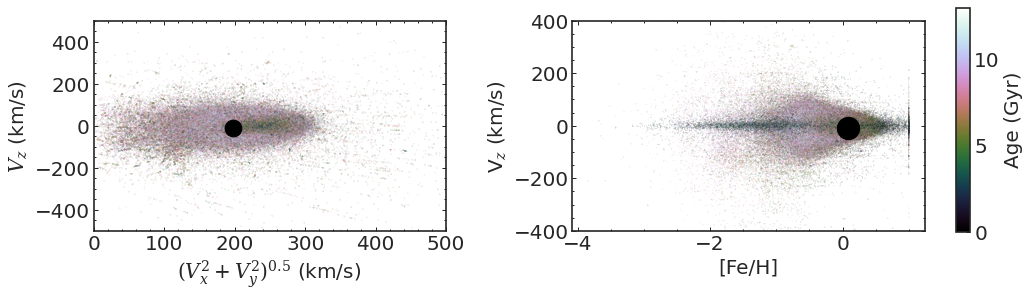

In [7]:
#select stars within vsample< v and metallicity within 1 sigma 
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity', 'velocity'], plot=True, plot_kde=True,
                          file_plot=filename+'vel_ellipse_met1sigma.pdf', cmap='cubehelix')

Age: 6.70 -3.04 +2.26 Gyr


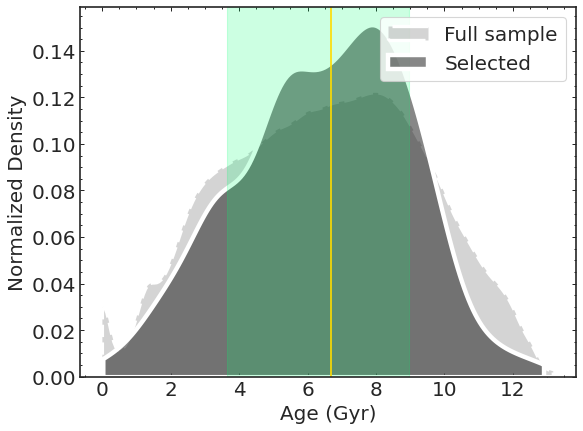

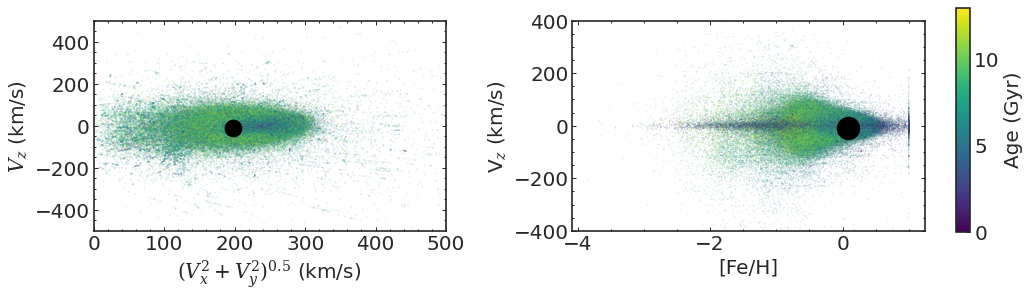

In [8]:
#select stars with 1 sigma of metallicity and velocity within 10 km/s (1-sigma too small)
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'],   velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_met1sigma.pdf', cmap='viridis')

Age: 6.56 -3.15 +2.15 Gyr


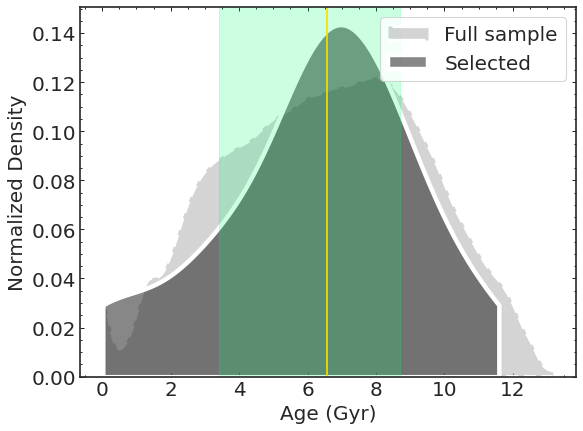

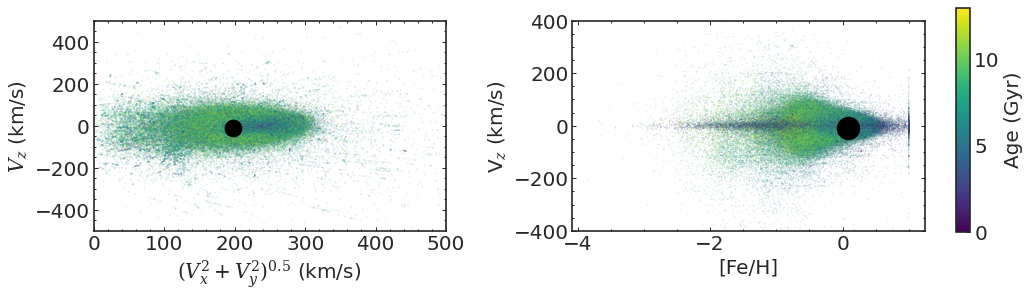

In [9]:
#select stars with 1 sigma of both metallicity and velocity within 10 km/s but only stars within 200 pc
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], 
                          volume=200,
                           velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_dist200pc_met1sigma.pdf', cmap='viridis')

Age: 6.57 -3.26 +2.24 Gyr


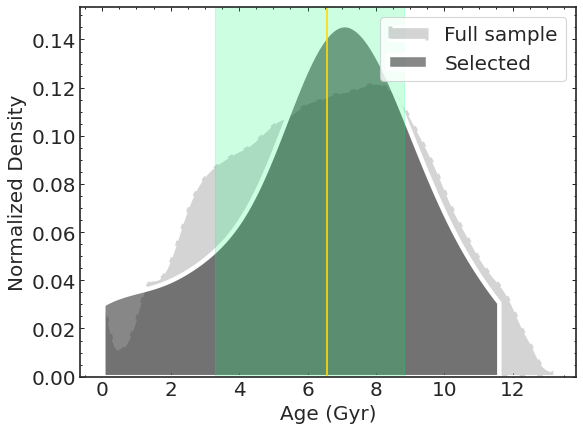

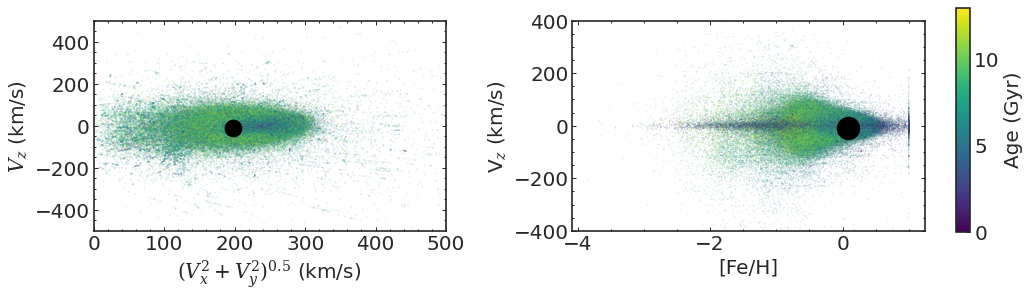

In [10]:
#select stars with 1 sigma of both metallicity and velocity within 10 km/s but only stars within 200 pc
res=quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], 
                          volume=200,
                           velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_dist200pc_met1sigma.pdf', cmap='viridis')

100%|███████████████████████████████████████████| 20/20 [00:04<00:00,  4.63it/s]


Age: 7.46 -2.91 +2.91 Gyr


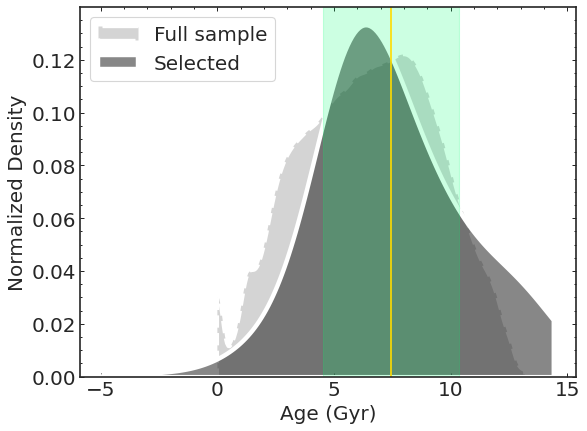

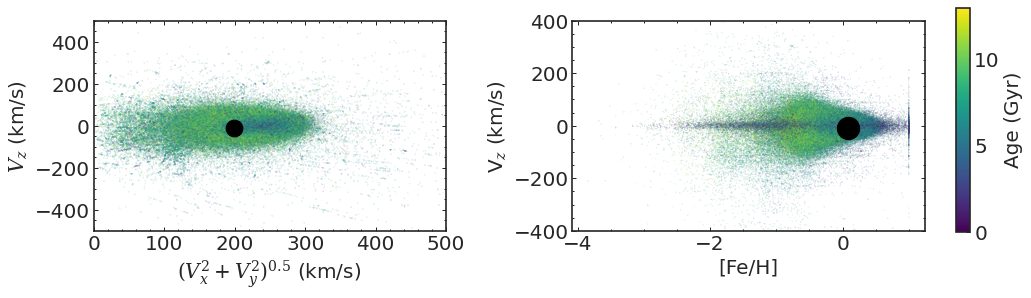

In [11]:

#compute weighted 
_= quickage.estimate_age(sourc, metal, nsigma=1,  data_set='galah',\
                          select_by=['metallicity'], weighted=True,
                          volume=200,
                           velocity_volume=10, plot=True, plot_kde=True,
                          file_plot=filename+'vel_10kms_dist200pc_met1sigma.pdf', cmap='viridis')

radial action (Jr) 3.85776e-02 +/- 3.88425e-03 kpc km/s
vertical angular momentum (Lz) -1.64139e+00 +/- 1.87518e-02 kpc km/s
vertical action (Jz) 7.01378e-04 +/- 1.36737e-04 kpc km/s
Age: 5.10 -2.87 +2.77 Gyr


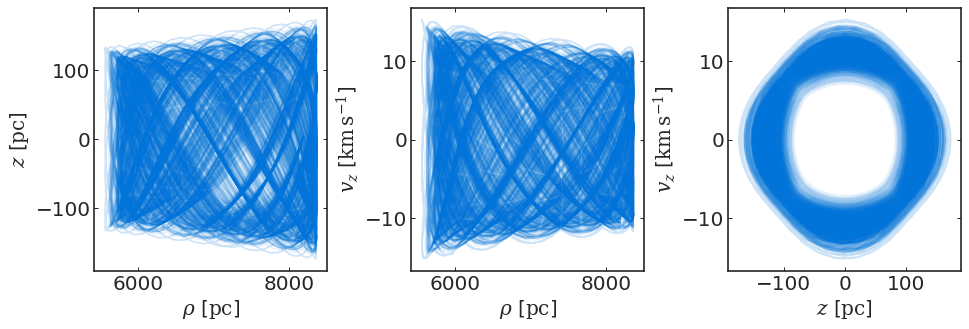

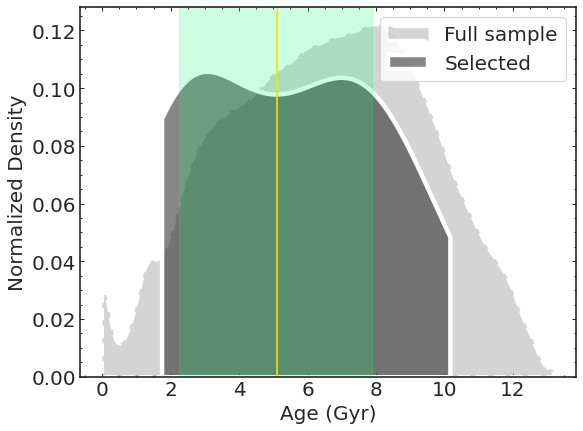

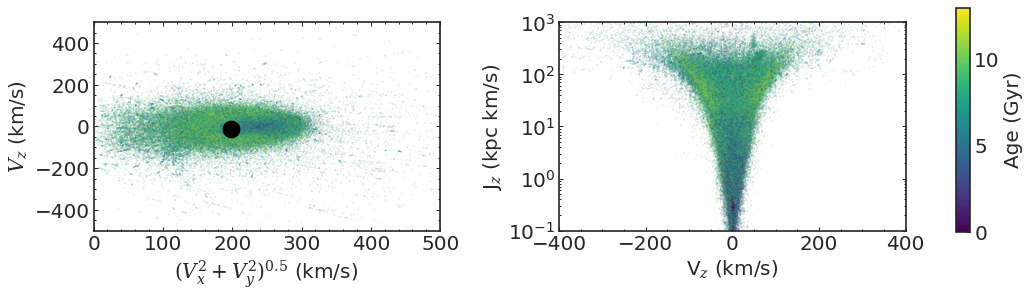

In [12]:
#compute weighted age and add constraint on jz
_= quickage.estimate_age(sourc, metal, nsigma=5,  data_set='galah',\
                          select_by=['metallicity', 'actions'], weighted=False,
                         plot=True, plot_kde=True, plot_orbits=True,
                          file_plot=filename+'actions_metal.pdf', cmap='viridis')

In [14]:
res['coords']

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.2 kpc, galcen_v_sun=(11.1, 248., 7.25) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8189.62426535, -37.73795332, 4.22506167),
     (-8189.60602691, -37.80445807, 4.19585203),
     (-8189.60305844, -37.81528232, 4.19109789),
     (-8189.61502982, -37.7716298 , 4.21027058),
     (-8189.61897472, -37.7572451 , 4.2165885 ),
     (-8189.61533701, -37.77050969, 4.21076254),
     (-8189.61349575, -37.77722364, 4.2078137 ),
     (-8189.61968797, -37.7546443 , 4.2177308 ),
     (-8189.60479795, -37.80893938, 4.19388379),
     (-8189.60916481, -37.79301603, 4.2008775 ),
     (-8189.62076126, -37.75073066, 4.21944972),
     (-8189.61837507, -37.75943167, 4.21562814),
     (-8189.60761352, -37.79867266, 4.19839305),
     (-8189.62487783, -37.73571997, 4.22604258),
     (-8189.62589724, -37.73200277, 4.22767522),
     (-8189.62774624, -37.72526057, 4.23063647),
 